## **Mount implementation folder in google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
encoded-data.csv	selected_columns_all.csv  UNSW-NB15_1.csv
NUSW-NB15_features.csv	selected_columns.csv	  UNSW-NB15_2.csv
OTset.csv		selected_columns_dos.csv  UNSW-NB15_3.csv
preprocessing.csv	SVR-predict-data.csv	  UNSW-NB15_4.csv
preprosessing-dos.csv	testset.csv


## **get training data**

data = (X, Y)

In [4]:
import pandas as pd
from sklearn.utils import shuffle
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']



#data for information gain
DoS_attacks_all = df[df['Analysis'] == 1]
Normal_Data_all = df[df['Label'] == 0]
frames_all = [DoS_attacks_all, Normal_Data_all]
result_all = pd.concat(frames_all)
X_all = result_all.drop(labels=attack_labels, axis=1)
Y_all=result_all[['Analysis']]



## **Feature Selection Using Information Gain**

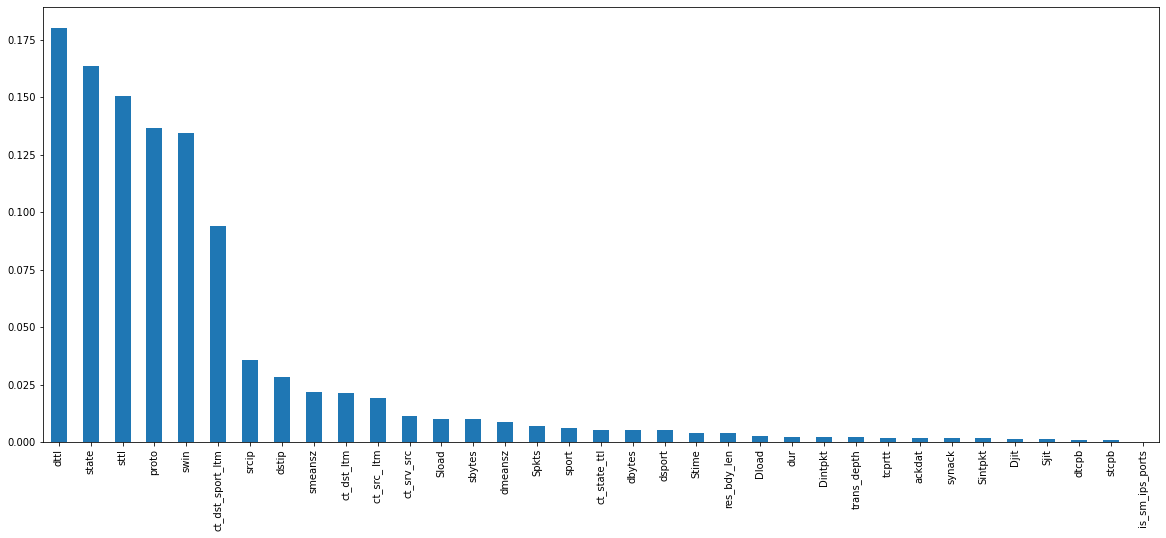

In [6]:
# #tutorial 3
# mutual information gain

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

mutual_info = mutual_info_classif(X_all, Y_all[:]['Analysis'])
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_all.columns
mutual_info.sort_values(ascending = False).plot.bar(figsize=(20, 8))

In [7]:
# select top n features
n = 15
top_columns = SelectKBest(mutual_info_classif, k=n)
top_columns.fit(X_all, Y_all[:]['Analysis'])

SelectKBest(k=15, score_func=<function mutual_info_classif at 0x7f366c61d160>)

In [8]:
top_columns.get_support()

array([ True, False,  True, False,  True,  True, False,  True, False,
        True,  True,  True, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True])

In [9]:
X_all.columns[top_columns.get_support()]

Index(['srcip', 'dstip', 'proto', 'state', 'sbytes', 'sttl', 'dttl', 'Sload',
       'swin', 'smeansz', 'dmeansz', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_dst_sport_ltm'],
      dtype='object')

## **Writing seleted column names to a csv file**

file name: selected_columns.csv

In [11]:
#write appropriate columns to a csv file
#DOS
selected_columns =  list(X_all.columns[top_columns.get_support()])
df = pd.DataFrame(selected_columns, columns =['Analysis'])
df.to_csv("selected_columns_all.csv", header=True, index=False)